# Introduction to clustering
* We have $n$ *features* for $m$ units, just like a classification problem. 
* But unline classification, there is no 'labels'.
* We want to "discover" similar "groups" AKA **clusters**. 


![](https://cssanalytics.files.wordpress.com/2013/11/cluster-image.png)

## Examples
* Given a set of news article, cluster them by topics.
* Given geometrical properties of petals of different flowers, cluster them by species. 

# K-means clustering

## The principle

For a set of feature vectors $S=\{\mathbf{x}_i: 1<i<N\}$, minimize over all possible partitions of the set $S$ into $k$ subsets:
$$
{\underset {\mathbf {S} }{\operatorname {arg\,min} }}\sum _{i=1}^{k}\sum _{\mathbf {x} \in S_{i}}\left\|\mathbf {x} -{\boldsymbol {\mu }}_{i}\right\|^{2}={\underset {\mathbf {S} }{\operatorname {arg\,min} }}\sum _{i=1}^{k}|S_{i}|\operatorname {Var} S_{i}
$$

What it means:
* "in-cluster variance" is minimized.


**IMPORTANT:** A definition of "distance" is crucial for clustering to function.

It is not so trivial to decide on a definition of distance, when different features are disparate: e.g. Budget of a movie and number of cars appearing in it. 

## K-means

[[ -5.19811282e+00   6.41869316e-01]
 [ -5.75229538e+00   4.18627111e-01]
 [ -1.08448984e+01  -7.55352273e+00]
 ..., 
 [  1.36105255e+00  -9.07491863e-01]
 [ -3.54141108e-01   7.12241630e-01]
 [  1.88577252e+00   1.41185693e-03]]


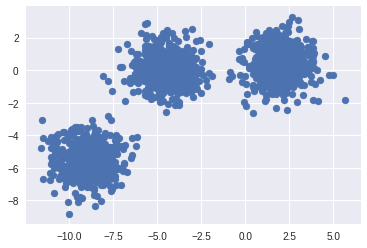

In [111]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

print(X)

plt.scatter(X[:, 0], X[:, 1])



#kmeans.labels_
#kmeans.cluster_centers_



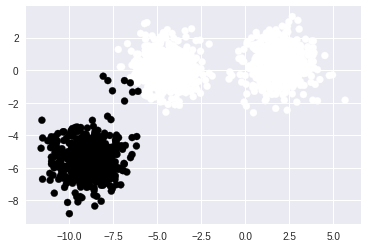

In [112]:
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred)

### Cluster centers

In [113]:
kmeans.cluster_centers_

array([[-8.91107142, -5.41122529],
       [-1.27564294,  0.22781384]])

### Point labels

In [114]:
kmeans.labels_

array([1, 1, 0, ..., 1, 1, 1], dtype=int32)

In [115]:
#X_new = KMeans(n_clusters=2, random_state=random_state).fit_transform(X)
#print(X_new)

# Some pitfalls

*  Some cases where k-means will produces unexpected clusters.

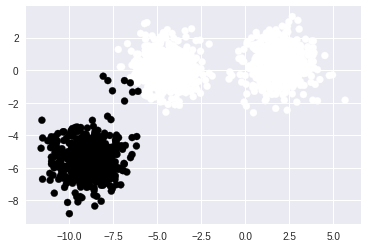

In [116]:
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred);


### Remedy : Silhouette measure

* Silhouette measure $s(i)$ for a point $i$ is defined as

$$s(i)=\frac{d_n(i)-d_o(i)}{max[d_n(i),d_o(i)]}$$

where 

- $d_o(i)$ is the average distance of i with all points in the same cluster.
- $d_n(i)$ is the 'lowest' average distance of i with all points in the any neigbouring cluster.

* Compute $s(i)$ for each point and then take the aaverage, which is the Silhouette average. 

* $-1\leq s(i)\leq 1$. 

* If $s(i)\rightarrow +1$, it means the concerned point is well separated from the neighbouring clusters.$

Silhoueete avg. for 2 clusters =  0.627737523771
Silhoueete avg. for 3 clusters =  0.733342348626


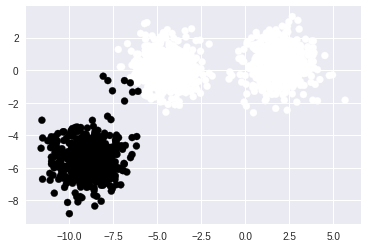

In [117]:
from sklearn.metrics import silhouette_samples, silhouette_score

y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
silhouette_avg = silhouette_score(X, y_pred)

print('Silhoueete avg. for 2 clusters = ',silhouette_avg)

y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X)
#plt.scatter(X[:, 0], X[:, 1], c=y_pred)
silhouette_avg = silhouette_score(X, y_pred)

print('Silhoueete avg. for 3 clusters = ',silhouette_avg)

### Anisotropy

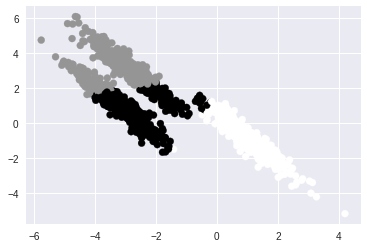

In [118]:
# Anisotropicly distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)


plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)

### Different standard deviation

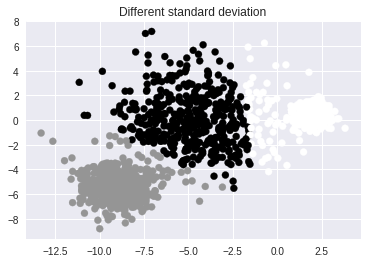

In [119]:

# Different variance
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Different standard deviation")

# Exercise

Use `beautifulsoup`and `pd.read_csv` to obtain worldwide statistics of countries according to at least three criteria, e.g.
* GDP per capita.
* Life expectancy.
* HDI index. 


1. Now, using all combinations of two criteria among these, compute clustering of the countries. 
2. Plot the datapoints by plt.scatter. Try to identify which countries fall in which cluster.
3. On the same plot, plot the country names as well (look at ax.text in matplotlib documentation). It might also be better to sample a subset of the countries.